In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy import stats
import numpy as np

In [29]:
#Load file (no need for path csv file in the same file)
df = pd.read_csv("exams.csv")   

Initial Data:
   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          

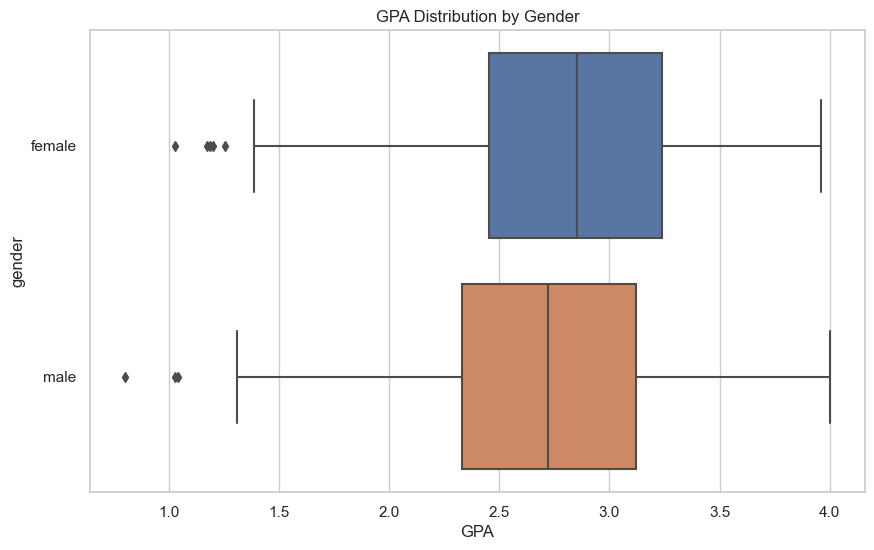

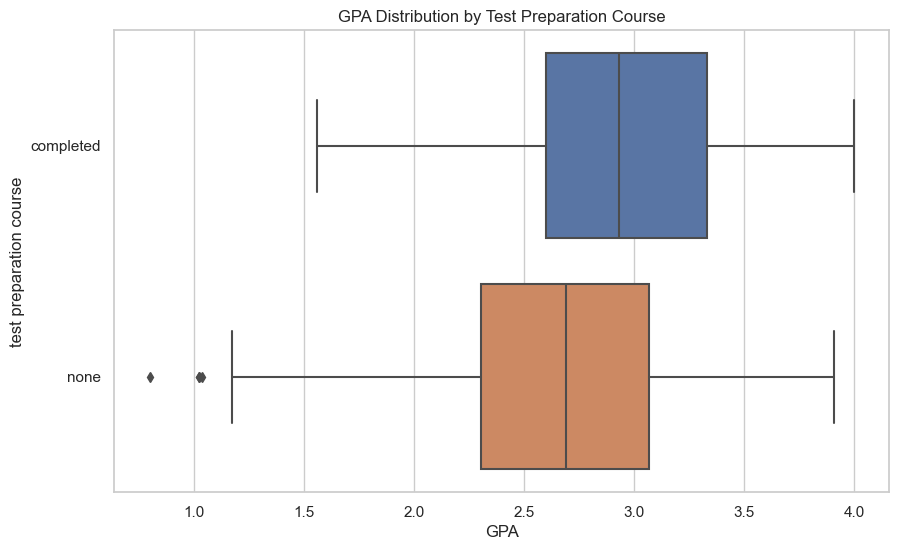

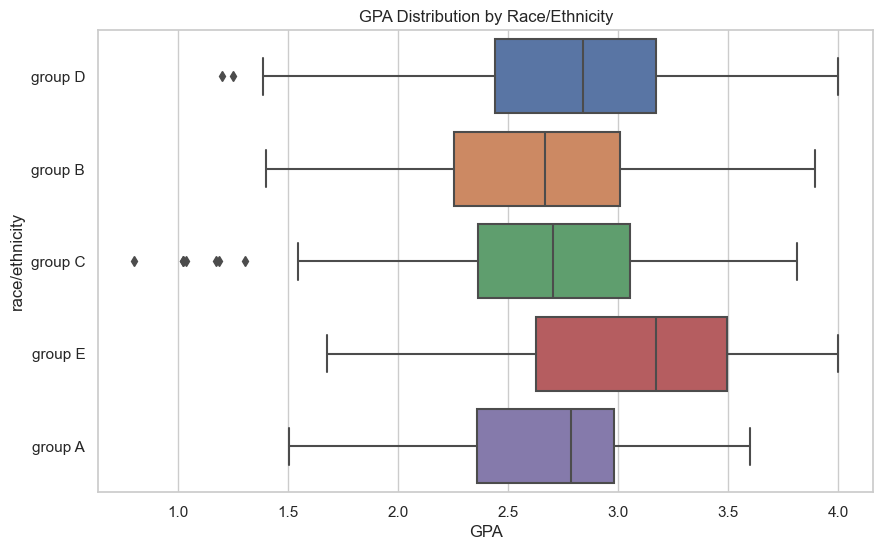

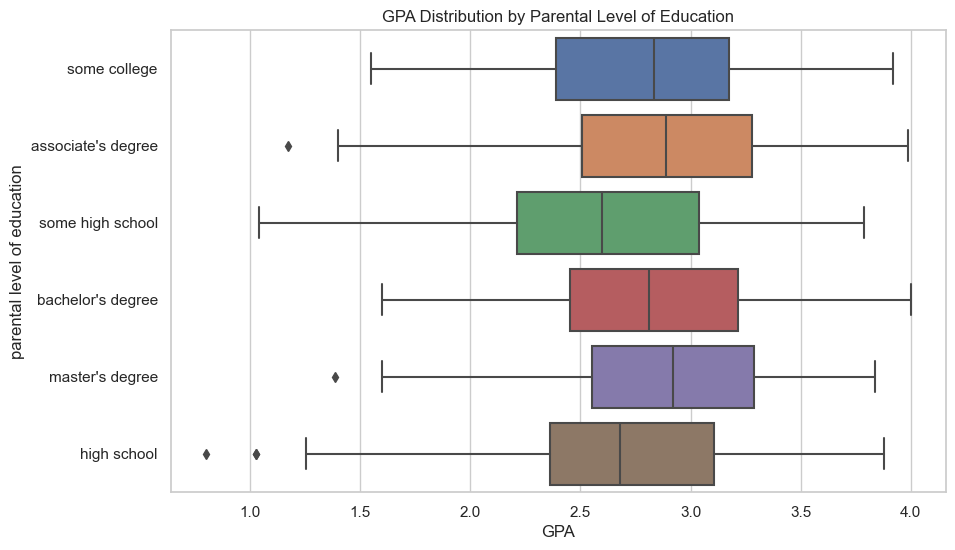

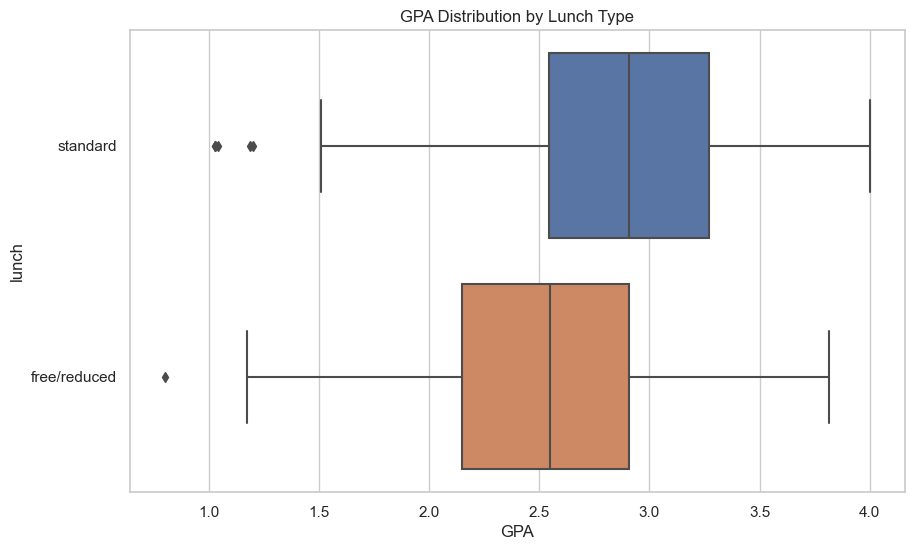

In [30]:
# Display initial data

print("Initial Data:")
print(df.head())
print("\nData Information:")
print(df.info())

# Calculate GPA from test scores

test_score_columns = ['math score', 'reading score', 'writing score']

# Calculate the GPA (assuming scores are out of 100)

df['GPA'] = df[test_score_columns].mean(axis=1) / 25





# Descriptive Statistics

print("\nDescriptive Statistics of GPA:")
print(df['GPA'].describe())



# Boxplot of GPA by gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='gender', data=df)
plt.title('GPA Distribution by Gender')
plt.show()

# Boxplot of GPA by test preparation course

plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='test preparation course', data=df)
plt.title('GPA Distribution by Test Preparation Course')
plt.show()

# Boxplot of GPA by race/ethnicity

plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='race/ethnicity', data=df)
plt.title('GPA Distribution by Race/Ethnicity')
plt.show()

# Boxplot of GPA by parental level of education

plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='parental level of education', data=df)
plt.title('GPA Distribution by Parental Level of Education')
plt.show()

# Boxplot of GPA by lunch type

plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='lunch', data=df)
plt.title('GPA Distribution by Lunch Type')
plt.show()

In [48]:

def z_test(sample1, sample2):
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)
    
    # Calculate pooled standard error
    pooled_se = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    
    # Calculate z-statistic
    z_score = (mean1 - mean2) / pooled_se
    
    # Calculate p-value using the normal distribution (since we're using z-test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    
    return z_score, p_value

# Hypothesis Testing for different variables

variables = {
    'Test Preparation Course': 'test preparation course',
    'Lunch Type': 'lunch',
    'Parental Level of Education': 'parental level of education',
    'Race/Ethnicity': 'race/ethnicity',
    'Gender': 'gender'
}

results = []

for var_name, var_column in variables.items():
    categories = df[var_column].unique()
    if len(categories) == 2:
        cat1, cat2 = categories
        sample1 = df[df[var_column] == cat1]['GPA']
        sample2 = df[df[var_column] == cat2]['GPA']
        
        z_score, p_value = z_test(sample1, sample2)
        results.append((var_name, cat1, cat2, z_score, p_value))
    else:
        for i in range(len(categories)):
            for j in range(i + 1, len(categories)):
                cat1, cat2 = categories[i], categories[j]
                sample1 = df[df[var_column] == cat1]['GPA']
                sample2 = df[df[var_column] == cat2]['GPA']
                
                z_score, p_value = z_test(sample1, sample2)
                results.append((var_name, cat1, cat2, z_score, p_value))

# Print the results
for result in results:
    var_name, cat1, cat2, z_score, p_value = result
    print(f'{var_name} ({cat1} vs {cat2}):')
    print(f'  Z-score: {z_score}, P-value: {p_value}')
    if p_value < 0.05:
        print('  Result: Reject the null hypothesis (significant difference)')
    else:
        print('  Result: Fail to reject the null hypothesis (no significant difference)')
    print()


Test Preparation Course (completed vs none):
  Z-score: 7.755533073462701, P-value: 8.881784197001252e-15
  Result: Reject the null hypothesis (significant difference)

Lunch Type (standard vs free/reduced):
  Z-score: 10.025749949783002, P-value: 0.0
  Result: Reject the null hypothesis (significant difference)

Parental Level of Education (some college vs associate's degree):
  Z-score: -1.4937275495614588, P-value: 0.1352468447753925
  Result: Fail to reject the null hypothesis (no significant difference)

Parental Level of Education (some college vs some high school):
  Z-score: 3.015207192034713, P-value: 0.002568037625207964
  Result: Reject the null hypothesis (significant difference)

Parental Level of Education (some college vs bachelor's degree):
  Z-score: -1.0010305967354647, P-value: 0.3168120163896102
  Result: Fail to reject the null hypothesis (no significant difference)

Parental Level of Education (some college vs master's degree):
  Z-score: -1.0582103759725274, P-va

SGDRegressor()
Number of iterations completed: 9, number of weight updates: 7201.0
Model parameters:
Coefficients: [-0.14  0.19 -0.   -0.07  0.01 -0.04 -0.09 -0.01  0.    0.04  0.13 -0.07]
Intercept: [2.76]
Prediction using np.dot() and sgdr.predict match: True
Predictions on training set:
[2.85 2.37 3.05 2.86]
Target values:
29     3.506667
535    2.226667
695    3.226667
557    2.693333
Name: GPA, dtype: float64


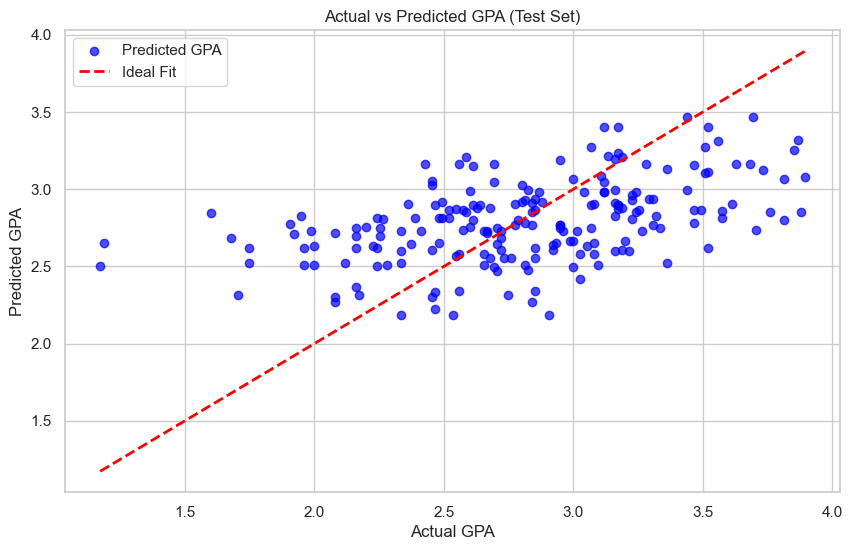

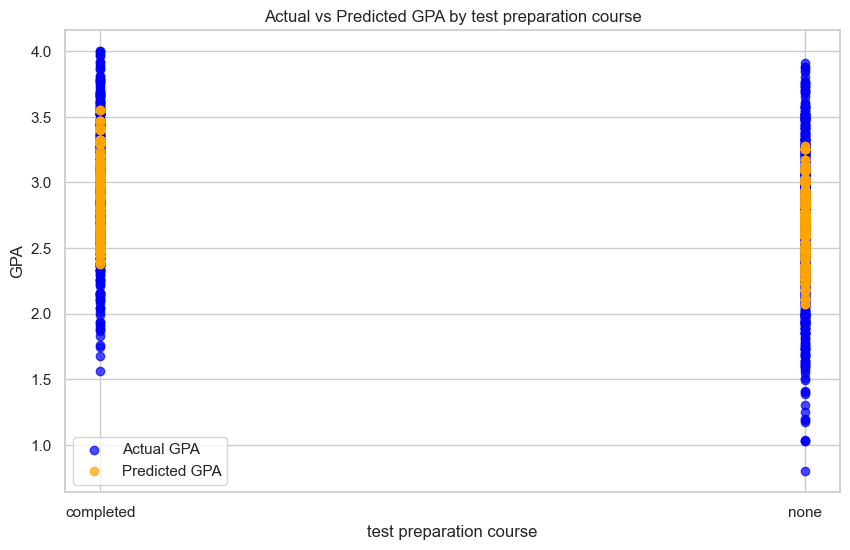

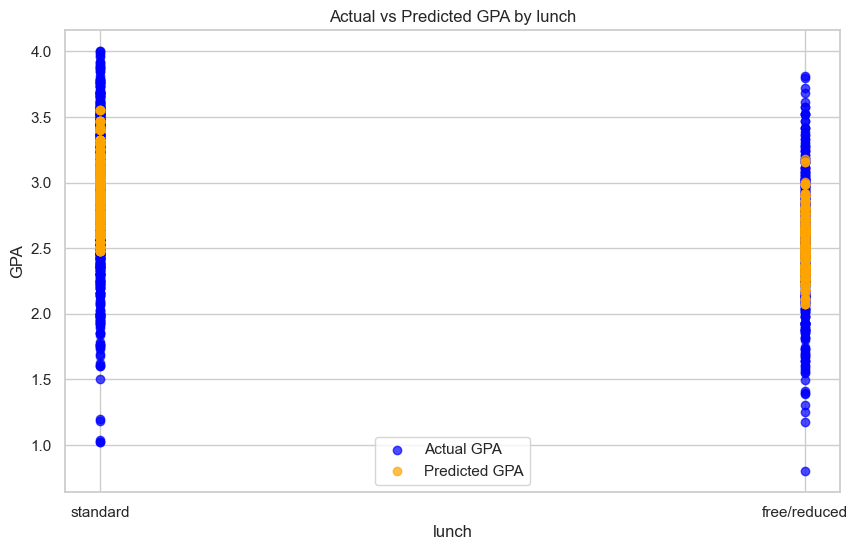

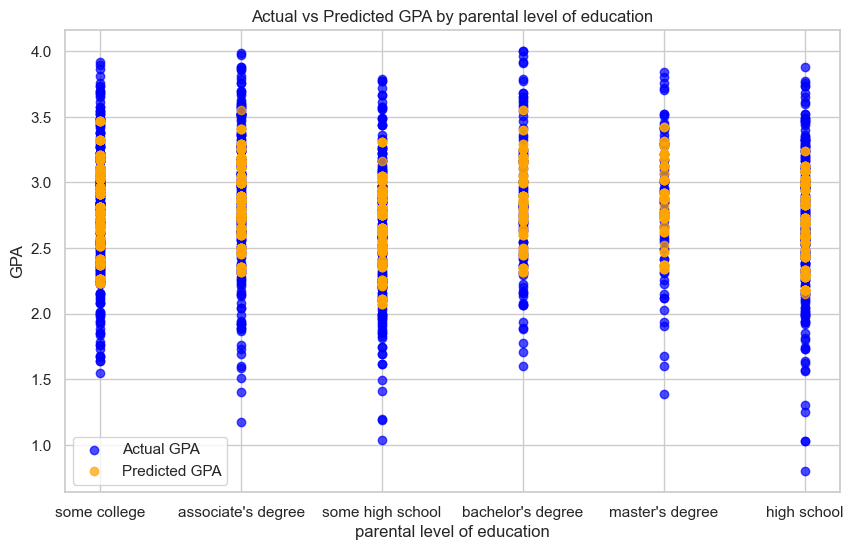

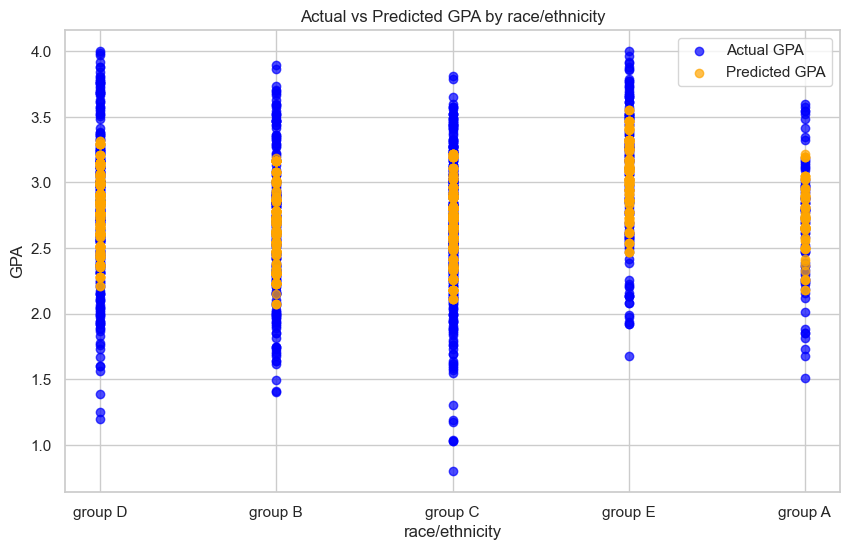

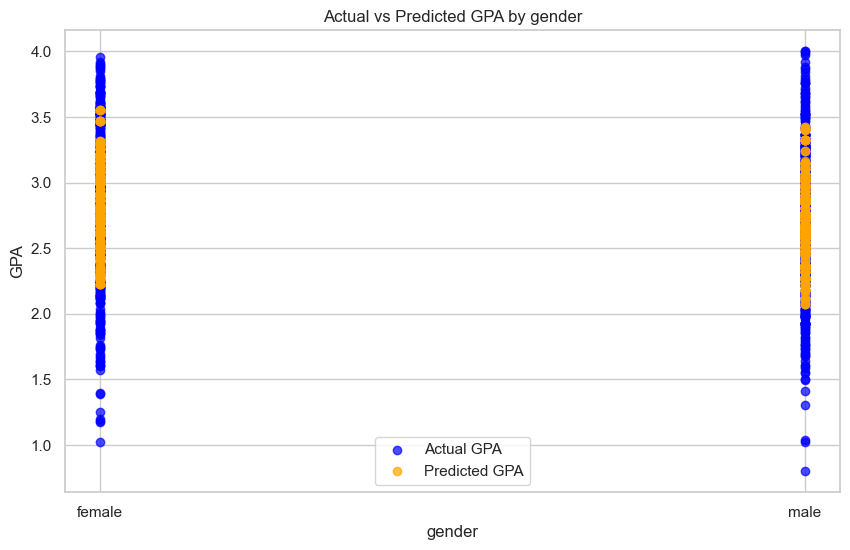

In [44]:

from sklearn.linear_model import SGDRegressor     
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=2)


# Prepare the data for regression analysis

X_features = ['test preparation course', 'lunch', 'parental level of education', 'race/ethnicity', 'gender']



# Apply one-hot encoding to the categorical variables

df_encoded = pd.get_dummies(df, columns=X_features, drop_first=True)



# Define the independent variables (X) and dependent variable (y)

X = df_encoded.drop(columns=['GPA', 'math score', 'reading score', 'writing score']) 
y = df_encoded['GPA']



# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Standardize the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# Fit the regression model using SGDRegressor


sgdr = SGDRegressor(max_iter=1000, tol=1e-3)
sgdr.fit(X_train_scaled, y_train)





# Print model information

print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")





# Get model parameters

b_norm = sgdr.intercept_    # bias (intercept)
w_norm = sgdr.coef_         # coefficients (weights)

print(f"Model parameters:\nCoefficients: {w_norm}\nIntercept: {b_norm}")




# Make predictions using sgdr.predict() and manual calculation

y_train_pred_sgd = sgdr.predict(X_train_scaled)
y_train_pred = np.dot(X_train_scaled, w_norm) + b_norm




# Check if predictions match

print(f"Prediction using np.dot() and sgdr.predict match: {(y_train_pred == y_train_pred_sgd).all()}")



# Print predictions and target values


print(f"Predictions on training set:\n{y_train_pred[:4]}")
print(f"Target values:\n{y_train[:4]}")




# Plot actual vs predicted GPA values for the test set



plt.figure(figsize=(10, 6))
plt.scatter(y_test, sgdr.predict(X_test_scaled), alpha=0.7, color='blue', label='Predicted GPA')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA (Test Set)')
plt.legend()
plt.show()


# Plot actual vs predicted GPA values for each feature


for feature in X_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['GPA'], alpha=0.7, color='blue', label='Actual GPA')
    plt.scatter(df[feature], sgdr.predict(scaler.transform(df_encoded.drop(columns=['GPA', 'math score', 'reading score', 'writing score']))), alpha=0.7, color='orange', label='Predicted GPA')
    plt.xlabel(feature)
    plt.ylabel('GPA')
    plt.title(f'Actual vs Predicted GPA by {feature}')
    plt.legend()
    plt.show()